AIM: To extract user problems of the app. Basically reasons behind negative feedback of the app.

In [90]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

## Loading Data

In [51]:
df=pd.read_csv('C:/Users/Apoorva/OneDrive/Documents/ML_Practice/DataSets-Practice ML/nps.csv')


In [52]:
df

Score                         Text             screen view_type
0         10  very good and excellent app  submit_assignment   student
1         10                         good        end_lecture   student
2          3                          NaN        end_lecture   student
3          6                          NaN  submit_assignment   student
4          1                           no        end_lecture   student
...      ...                          ...                ...       ...
21654      7                          NaN        add_lecture   teacher
21655      0                          NaN  submit_assignment   student
21656     10                         good        add_lecture   teacher
21657     10       Great app for learners  submit_assignment   student
21658     10                          NaN  submit_assignment   student

[21659 rows x 4 columns]

## Removing null values

In [53]:
df=df.dropna( how='any',inplace=False)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7702 entries, 0 to 21657
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Score      7702 non-null   int64 
 1   Text       7702 non-null   object
 2   screen     7702 non-null   object
 3   view_type  7702 non-null   object
dtypes: int64(1), object(3)
memory usage: 300.9+ KB


In [55]:
df['Text']=df['Text'].astype(str)

<ipython-input-55-6654593f7db9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text']=df['Text'].astype(str)


## Printing and checking text values as in the feedbacks given by users. 

In [56]:
data = df['Text']   
data

0                              very good and excellent app
1                                                     good
4                                                       no
5                 the app is filled with bugs and glitches
7                                                        .
                               ...                        
21649                                                    😅
21651    When we press back button, we are not able to ...
21653            it is very good app for learning concepts
21656                                                 good
21657                               Great app for learners
Name: Text, Length: 7702, dtype: object

## Function to clean the text using re library

In [57]:
def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) 
    text=re.sub(r'#', '', text)            
    text=re.sub(r'RT[\s]+', '', text)      
    text=re.sub(r'https?:\/\/\S+', '', text)
    return text 

## Dividing the data into training and testing set

In [58]:
train, test = train_test_split(df,test_size = 0.1)

In [128]:
train_promoters = train[ (train['Score']>=9) & (train['Score'] <=10)]
train_promoters = train_promoters['Text']

train_passive = train[ (train['Score'] >=7) & (train['Score']<=8)]
train_passive = train_passive['Text']

train_detractor = train[ (train['Score'] <=6) ]
train_detractor = train_detractor['Text']

train_low_detract = train[ (train['Score'] <=4) ]
train_low_detract = train_low_detract['Text']

train_vlow_detract = train[ (train['Score'] <=3) ]
train_vlow_detract = train_vlow_detract['Text']

train_verylow_detract = train[ (train['Score'] <=2) ]
train_verylow_detract = train_verylow_detract['Text']

train_vl_detract = train[ (train['Score'] <=1) ]
train_vl_detract = train_vl_detract['Text']

In [68]:
train_data = train["Text"] 

In [117]:

train_submit = train[ (train['screen']=="submit_assignment")] 
train_submit = train_submit['Text']
train_end = train[ (train['screen'] =="end_lecture")] 
train_end = train_end['Text']
train_add = train[ (train['screen'] =="add_lecture")] 
train_add = train_add['Text']
train_finish = train[ (train['screen'] =="finish_test")] 
train_finish = train_finish['Text']

In [134]:
train_submit_detract = train[ (train['Score'] <=4) & (train['screen']=="submit_assignment")]
train_submit_detract = train_submit_detract['Text']
train_end_detract = train[ (train['Score'] <=4) & (train['screen']=="end_lecture")]
train_end_detract = train_end_detract['Text']

In [113]:
train_stud = train[ (train['view_type']=="student")] 
train_stud = train_stud['Text']
train_teach = train[ (train['view_type'] =="teacher")] 
train_teach = train_teach['Text']

## Function to plot wordcloud for respective training data sets. 

In [ ]:
stopwords = STOPWORDS
stopwords.add('will')

In [77]:
def wordcloud_draw(data, color = 'black'):
    feed = ''
    for val in data:
        tex=clean(val) 
        tex = str(tex)
        tokens = tex.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
     
        feed += " ".join(tokens)+" "
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(feed) 
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


## Plotting wordcloud for the feedbacks having NPS score 7,8 (Passive)

Passive words


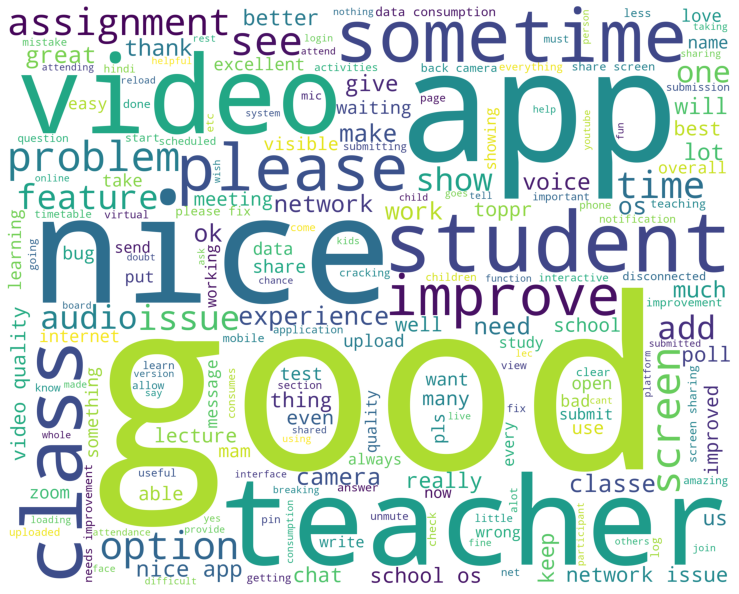

In [84]:


print("Passive words")
wordcloud_draw(train_passive, 'white')


Here you can see the problems identified are: 


Audio Issues,

Network Issue,

Unmute/mute issue, 

camera issue  

## Plotting wordcloud for the feedbacks having NPS score 9,10 (Promoters)

Promoter words


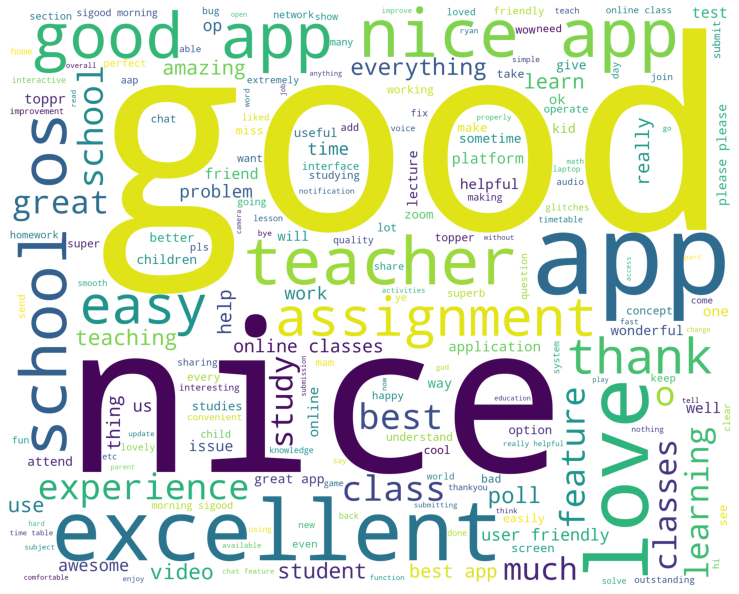

In [79]:
print("Promoter words")
wordcloud_draw(train_promoters,'white')

Here you can see the words identified are: 


easy teaching

love,wonderful, nice, thank you, best app, excellent, comfortable, outstanding, happy, etc. 

## Plotting wordcloud for the feedbacks having NPS score <=6 (Detractors)


Detractor words


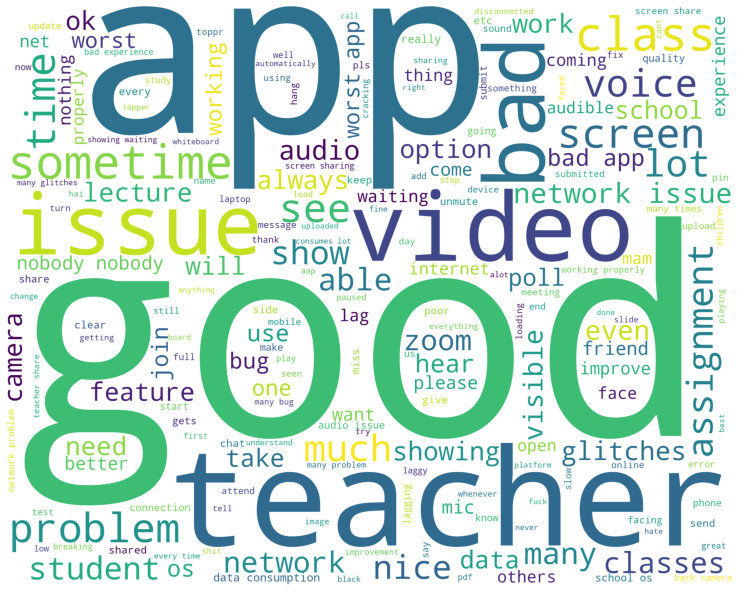

In [85]:
print("Detractor words")
wordcloud_draw(train_detractor, 'white')

## Plotting wordcloud for the feedbacks having NPS score <=4 (Detractors)


NPS Score<=4 words


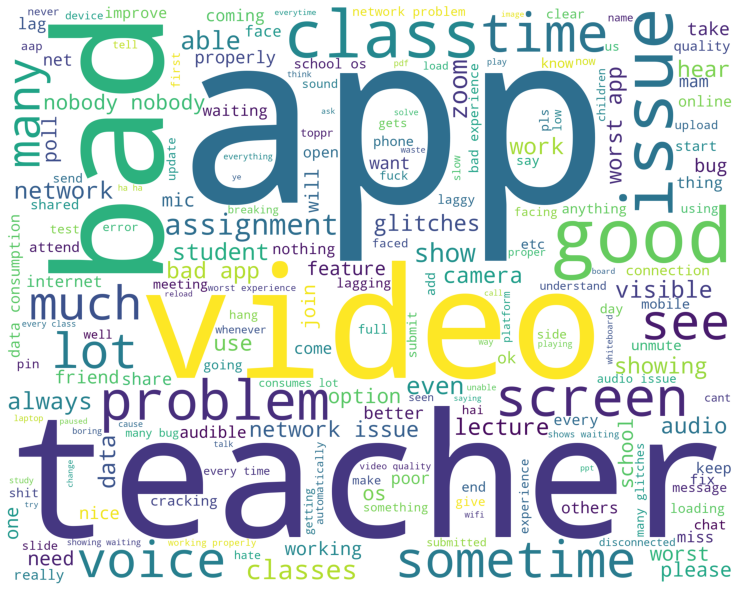

In [125]:

print("NPS Score<=4 words")
wordcloud_draw(train_low_detract, 'white')

## Plotting wordcloud for the feedbacks having NPS score <=3 (Detractors)


NPS Score<=3 words


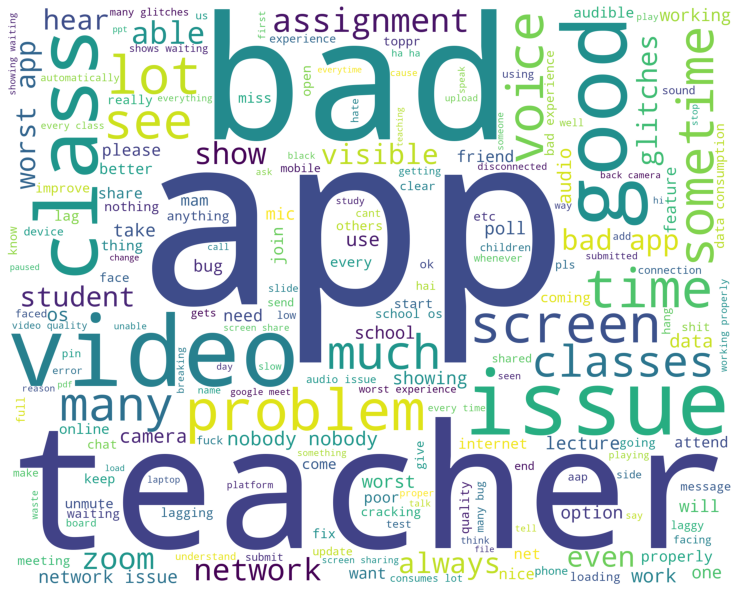

In [126]:

print("NPS Score<=3 words")
wordcloud_draw(train_vlow_detract, 'white')

## Plotting wordcloud for the feedbacks having NPS score <=2 (Detractors)


NPS Score<=2 words


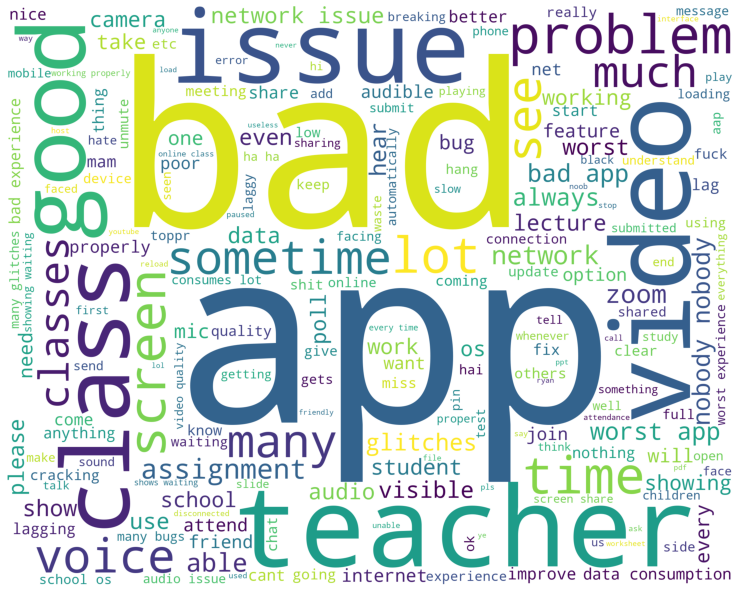

In [127]:

print("NPS Score<=2 words")
wordcloud_draw(train_verylow_detract, 'white')

## Plotting wordcloud for the feedbacks having NPS score =1 


NPS Score=1 words


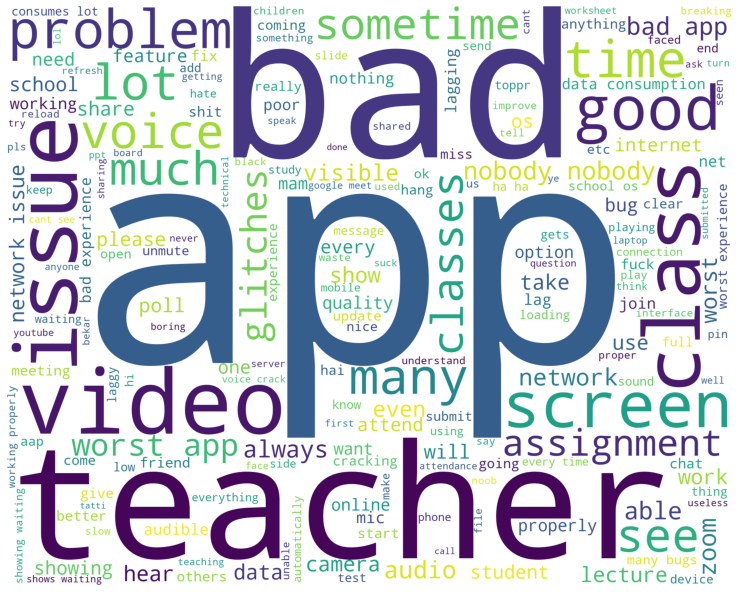

In [129]:
print("NPS Score=1 words")
wordcloud_draw(train_vl_detract, 'white')

Here you can see the problems identified are:
    
Bad network,

video quality poor, 

camera issue, 

many glitches, 

audio issue, 

fix message and chat issue, 

feature lagging, 

zoom bad experience, 

shows waiting all the time, 

voice cracking, 

improve data consumption.

## Plotting wordcloud for all the feedbacks.

All words


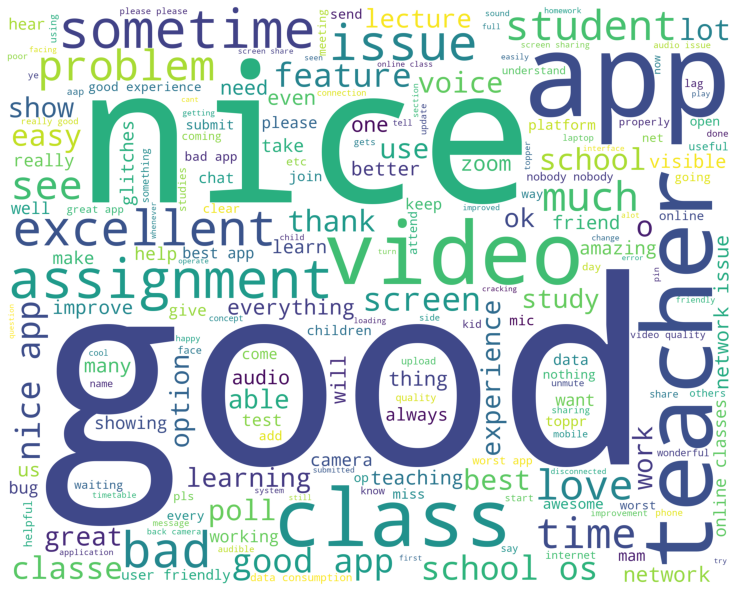

In [86]:
print("All words")
wordcloud_draw(train_data, 'white')

## Plotting wordcloud for the feedbacks where the screen is end_lecture. 


End Lecture words


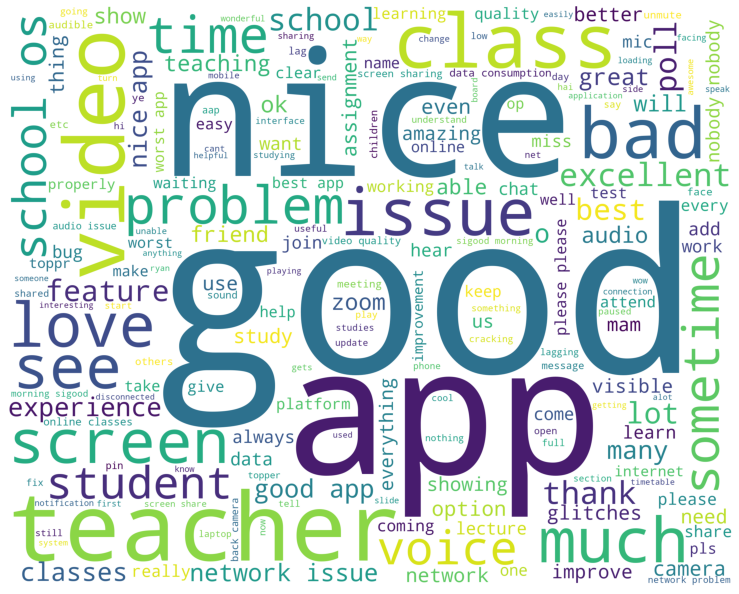

In [87]:
print("End Lecture words")
wordcloud_draw(train_end, 'white')

## Plotting wordcloud for the negative feedbacks where screen is end_lecture.

End Lecture and NPS score<=4 words


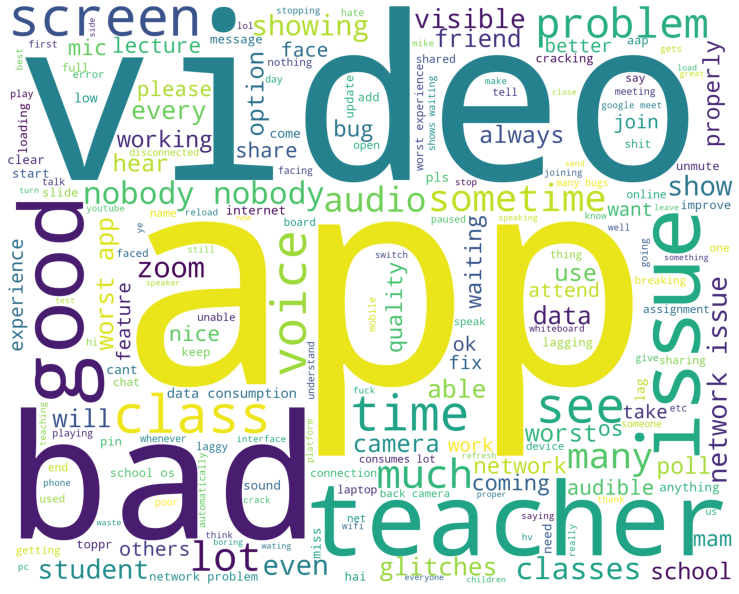

In [136]:
print("End Lecture and NPS score<=4 words")
wordcloud_draw(train_end_detract, 'white')

Here we can see at the time where screen is end_lecture the frequent words are: 
    
mic issue,mute/unmute, 

camera issue,

audio issue, sound crack 

glitches, 

network connection problem, 

improve data consumption

## Plotting wordcloud for the feedbacks where the screen is submit_assignment.

submit assignment words


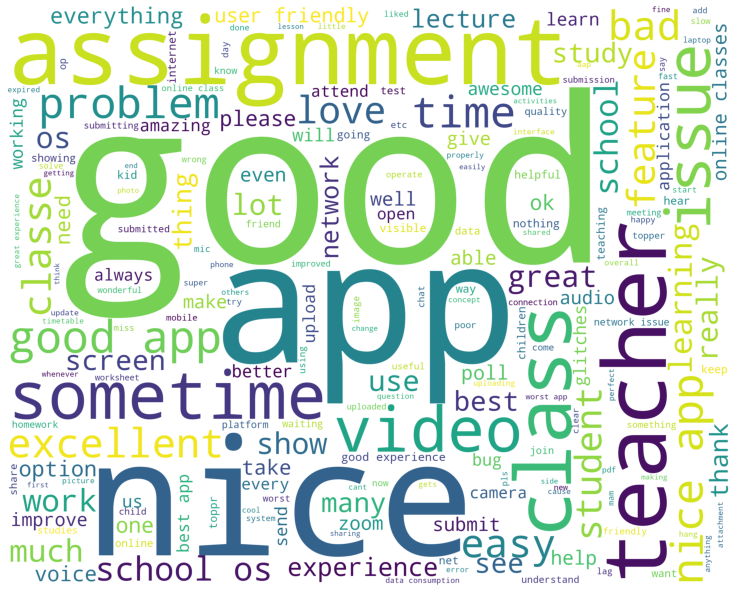

In [88]:
print("submit assignment words")
wordcloud_draw(train_submit, 'white')


## Plotting wordcloud for the negative feedbacks where screen is Submit assignment 

Submit assignment and NPS score <=4words


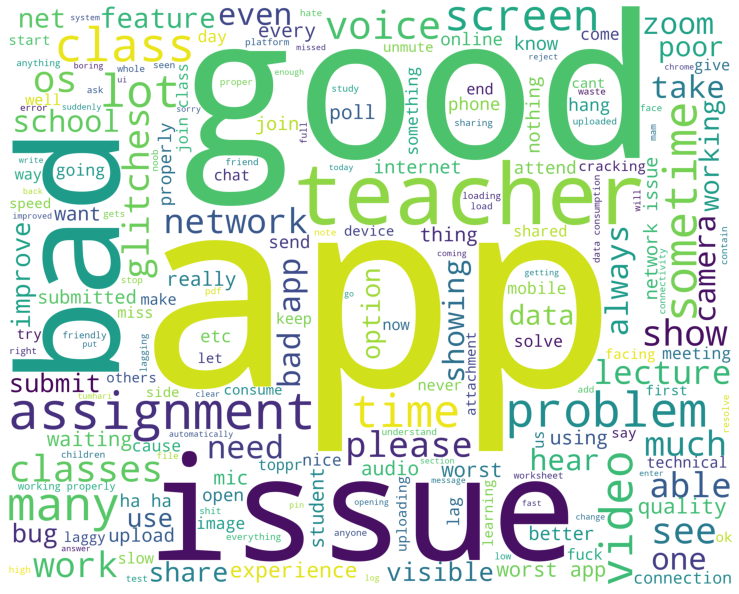

In [135]:
print("Submit assignment and NPS score <=4words")
wordcloud_draw(train_submit_detract, 'white')

Here we can see at the time where screen is submit_assignment the frequent negative words are: 

Glitches,

laggy and upload issue, slow, uploading issue

camera issue, 

network issue

## Plotting wordcloud for the feedbacks where the screen is add_lecture.


Add Lecture words


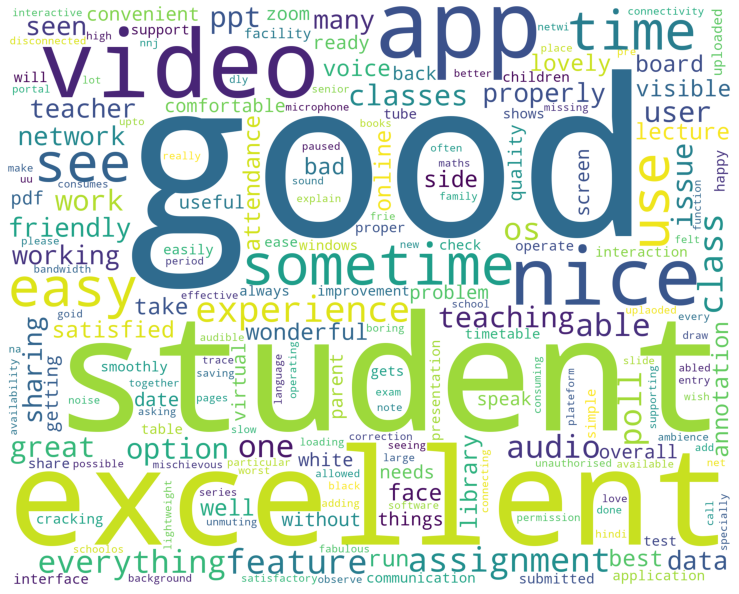

In [119]:

print("Add Lecture words")
wordcloud_draw(train_add, 'white')

## Plotting wordcloud for the feedbacks where the screen is finish test.

Finish Test words


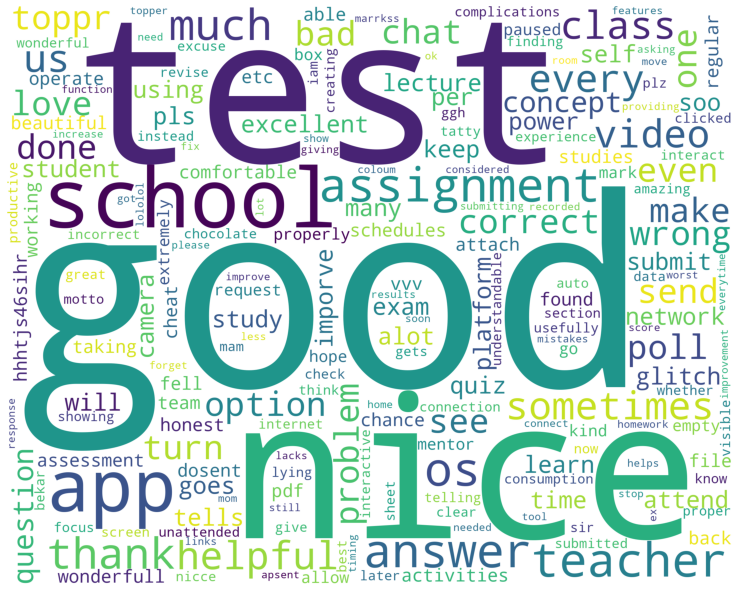

In [120]:

print("Finish Test words")
wordcloud_draw(train_finish, 'white')

## Plotting wordcloud for the feedbacks by students.


student words


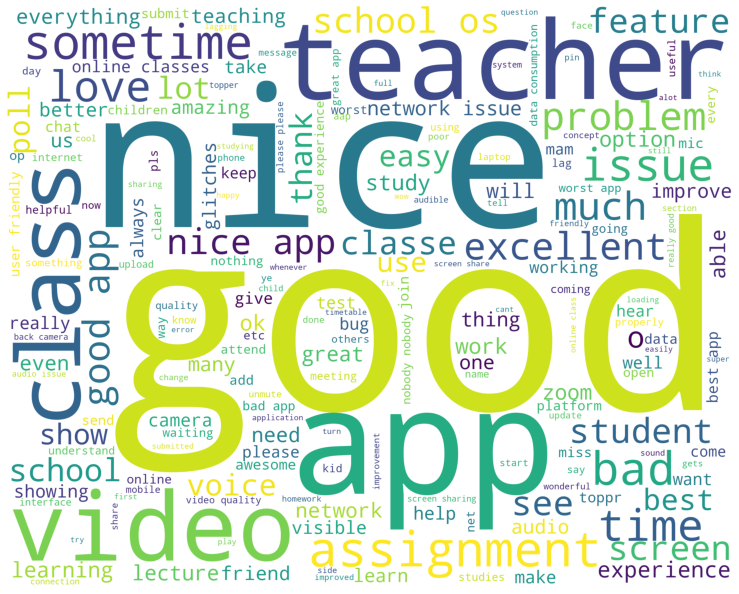

In [114]:
print("student words")
wordcloud_draw(train_stud, 'white')

## Plotting wordcloud for the feedbacks by teachers.


Teacher words


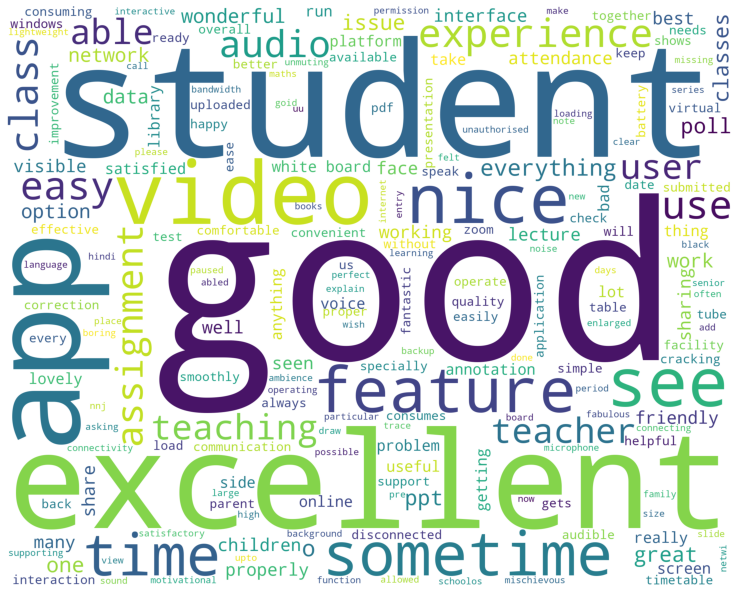

In [116]:
print("Teacher words")
wordcloud_draw(train_teach, 'white')

## Plotting the dataframe

In [74]:
df

Score                                               Text  \
0         10                        very good and excellent app   
1         10                                               good   
4          1                                                 no   
5          0           the app is filled with bugs and glitches   
7          2                                                  .   
...      ...                                                ...   
21649      1                                                  😅   
21651      6  When we press back button, we are not able to ...   
21653     10          it is very good app for learning concepts   
21656     10                                               good   
21657     10                             Great app for learners   

                  screen view_type  
0      submit_assignment   student  
1            end_lecture   student  
4            end_lecture   student  
5            end_lecture   student  
7            end_lecture   student  
...                  ...       ...  
21649        end_lecture   student  
21651  submit_assignment   student  
21653        end_lecture   student  
21656        add_lecture   teacher  
21657  submit_assignment   student  

[7702 rows x 4 columns]

## Plotting for the frequency of feedbacks for different screen type. 

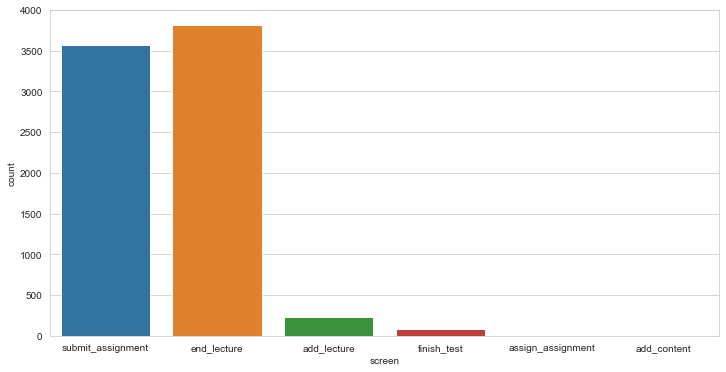

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(x='screen',data=df)


## Plotting for different scores given at different screen. 

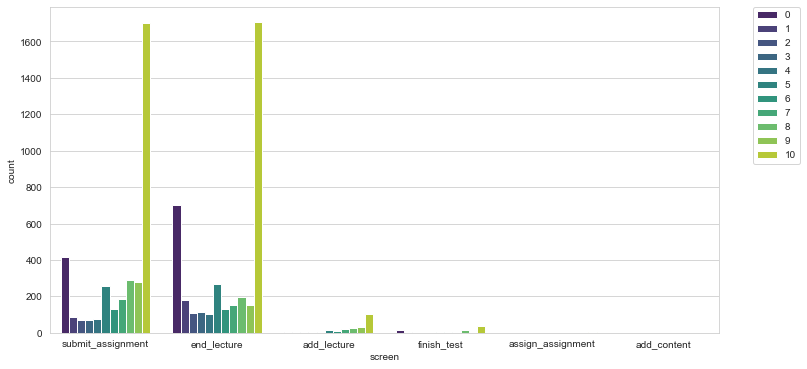

In [102]:
plt.figure(figsize=(12,6))
sns.countplot(x='screen',data=df,hue='Score',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Here we can see: 
    
end_lecture had the highest feedbacks and overall the scores are high only. 

For low scores we have fetched out the problems mentioned by users at the end of the code. 

## Plotting for the frequency of feedbacks by student and teacher.


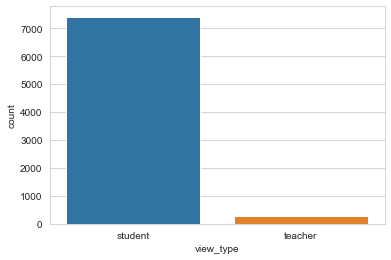

In [111]:
sns.countplot(x='view_type',data=df)


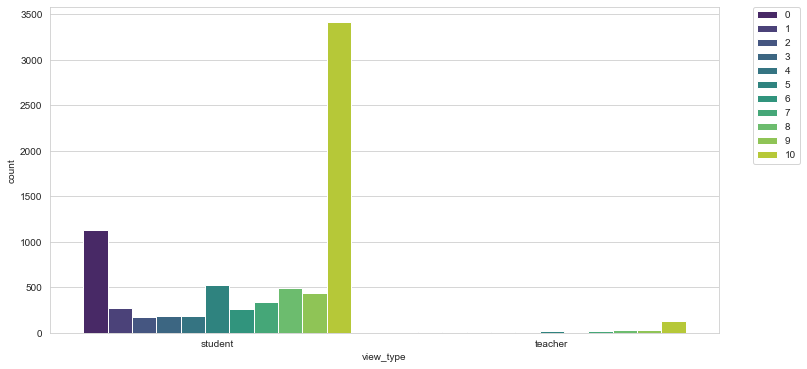

In [103]:
plt.figure(figsize=(12,6))
sns.countplot(x='view_type',data=df,hue='Score',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Here we can see:
Student has rated more comparatively and mostly the score is high only. 
    

# What are the frequent problems that users are facing?



#### Feedback given mostly when the screen is end_lecture
Bad network, connection breaking, shows waiting on the screen(network issue) 

poor video quality, 

camera issue, 

audio issue, voice cracking(not audible),

zoom bad experience

#### Feedback given mostly when the screen is submit_assignment
lag and upload issue, slow, uploading issue.

#### For all screens and view_type
many glitches,

mic issue,mute/unmute,

#### Suggestions
Fix message and chat issue and improve heavy data consumption.





